In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

640

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(2)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | kifri
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | kundiawa
Processing Record 5 of Set 1 | upernavik
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | romny
Processing Record 8 of Set 1 | thun
Processing Record 9 of Set 1 | qaanaaq
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | kununurra
Processing Record 13 of Set 1 | lusaka
Processing Record 14 of Set 1 | borogontsy
Processing Record 15 of Set 1 | shakawe
Processing Record 16 of Set 1 | brae
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | castro
Processing Record 19 of Set 1 | butaritari
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | porto novo
Processing Record 22 of Set 1 | cidreira
Processing Record 23 of Set 1 | ostrovnoy
Processing

Processing Record 42 of Set 4 | poso
Processing Record 43 of Set 4 | tupik
Processing Record 44 of Set 4 | kosya
City not found. Skipping...
Processing Record 45 of Set 4 | provideniya
Processing Record 46 of Set 4 | cortez
Processing Record 47 of Set 4 | valparaiso
Processing Record 48 of Set 4 | dickinson
Processing Record 49 of Set 4 | dukat
Processing Record 50 of Set 4 | saint pete beach
Processing Record 1 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 2 of Set 5 | gambela
Processing Record 3 of Set 5 | thinadhoo
Processing Record 4 of Set 5 | ereymentau
Processing Record 5 of Set 5 | port lincoln
Processing Record 6 of Set 5 | fortuna
Processing Record 7 of Set 5 | cockburn town
Processing Record 8 of Set 5 | chebenki
Processing Record 9 of Set 5 | mehamn
Processing Record 10 of Set 5 | ewa beach
Processing Record 11 of Set 5 | kupang
Processing Record 12 of Set 5 | saskylakh
Processing Record 13 of Set 5 | vaitape
Processing Record 14 of Set 5 | ambilobe


Processing Record 28 of Set 8 | havre-saint-pierre
Processing Record 29 of Set 8 | whitehorse
Processing Record 30 of Set 8 | baijiantan
Processing Record 31 of Set 8 | linxia
Processing Record 32 of Set 8 | riyadh
Processing Record 33 of Set 8 | urdoma
Processing Record 34 of Set 8 | estevan
Processing Record 35 of Set 8 | avera
Processing Record 36 of Set 8 | roma
Processing Record 37 of Set 8 | praya
Processing Record 38 of Set 8 | crossville
Processing Record 39 of Set 8 | qaqortoq
Processing Record 40 of Set 8 | wenatchee
Processing Record 41 of Set 8 | lebu
Processing Record 42 of Set 8 | osa
Processing Record 43 of Set 8 | rio grande
Processing Record 44 of Set 8 | prieska
Processing Record 45 of Set 8 | saleaula
City not found. Skipping...
Processing Record 46 of Set 8 | taoudenni
Processing Record 47 of Set 8 | kaduqli
Processing Record 48 of Set 8 | salalah
Processing Record 49 of Set 8 | hasaki
Processing Record 50 of Set 8 | najran
Processing Record 1 of Set 9 | presque isl

Processing Record 18 of Set 12 | fort nelson
Processing Record 19 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 20 of Set 12 | nelson bay
Processing Record 21 of Set 12 | mansa
Processing Record 22 of Set 12 | pasighat
Processing Record 23 of Set 12 | rocha
Processing Record 24 of Set 12 | cockburn harbour
City not found. Skipping...
Processing Record 25 of Set 12 | eyl
Processing Record 26 of Set 12 | samusu
City not found. Skipping...
Processing Record 27 of Set 12 | marystown
Processing Record 28 of Set 12 | pierre
Processing Record 29 of Set 12 | terre haute
Processing Record 30 of Set 12 | dubna
Processing Record 31 of Set 12 | tonj
Processing Record 32 of Set 12 | gidole
Processing Record 33 of Set 12 | christchurch
Processing Record 34 of Set 12 | peleduy
Processing Record 35 of Set 12 | mozarlandia
Processing Record 36 of Set 12 | lieksa
Processing Record 37 of Set 12 | montepuez
Processing Record 38 of Set 12 | kilembe
Processing Record 39 of Set 12 | ayagoz
Processi

In [8]:
len(city_data)

591

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,83.95,84,38,8.50,US,2022-08-02 16:21:42
1,Kifri,34.6959,44.9661,108.82,8,0,5.35,IQ,2022-08-02 16:21:42
2,Hobart,-42.8794,147.3294,56.26,65,40,10.36,AU,2022-08-02 16:20:18
3,Kundiawa,-6.0167,144.9667,59.49,97,99,2.73,PG,2022-08-02 16:21:42
4,Upernavik,72.7868,-56.1549,45.70,74,82,11.23,GL,2022-08-02 16:21:43
5,Punta Arenas,-53.1500,-70.9167,44.71,76,75,10.36,CL,2022-08-02 16:16:48
6,Romny,50.7510,33.4747,73.31,77,100,5.21,UA,2022-08-02 16:21:43
7,Thun,46.7512,7.6217,87.82,32,58,5.01,CH,2022-08-02 16:21:43
8,Qaanaaq,77.4840,-69.3632,45.57,57,90,2.73,GL,2022-08-02 16:21:43
9,Busselton,-33.6500,115.3333,51.31,70,94,28.36,AU,2022-08-02 16:21:44


In [10]:
new_column_order = ["City", 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2022-08-02 16:21:42,42.6001,-73.9662,83.95,84,38,8.50
1,Kifri,IQ,2022-08-02 16:21:42,34.6959,44.9661,108.82,8,0,5.35
2,Hobart,AU,2022-08-02 16:20:18,-42.8794,147.3294,56.26,65,40,10.36
3,Kundiawa,PG,2022-08-02 16:21:42,-6.0167,144.9667,59.49,97,99,2.73
4,Upernavik,GL,2022-08-02 16:21:43,72.7868,-56.1549,45.70,74,82,11.23
5,Punta Arenas,CL,2022-08-02 16:16:48,-53.1500,-70.9167,44.71,76,75,10.36
6,Romny,UA,2022-08-02 16:21:43,50.7510,33.4747,73.31,77,100,5.21
7,Thun,CH,2022-08-02 16:21:43,46.7512,7.6217,87.82,32,58,5.01
8,Qaanaaq,GL,2022-08-02 16:21:43,77.4840,-69.3632,45.57,57,90,2.73
9,Busselton,AU,2022-08-02 16:21:44,-33.6500,115.3333,51.31,70,94,28.36


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

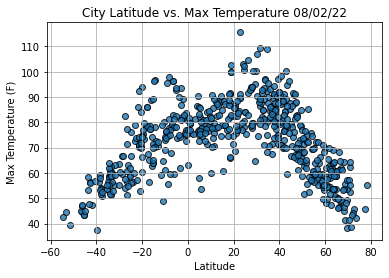

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

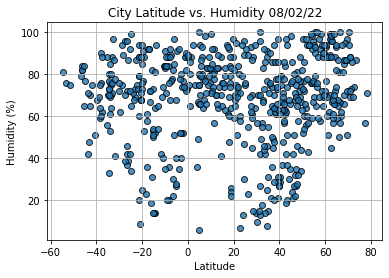

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

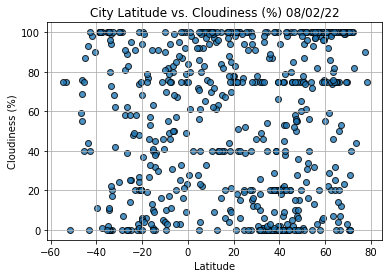

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

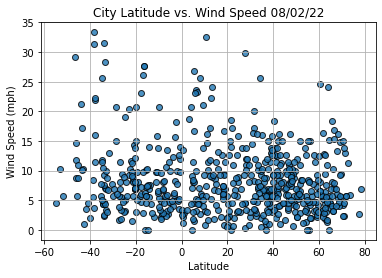

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2022-08-02 16:21:42,42.6001,-73.9662,83.95,84,38,8.50
1,Kifri,IQ,2022-08-02 16:21:42,34.6959,44.9661,108.82,8,0,5.35
4,Upernavik,GL,2022-08-02 16:21:43,72.7868,-56.1549,45.70,74,82,11.23
6,Romny,UA,2022-08-02 16:21:43,50.7510,33.4747,73.31,77,100,5.21
7,Thun,CH,2022-08-02 16:21:43,46.7512,7.6217,87.82,32,58,5.01


In [20]:
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Hobart,AU,2022-08-02 16:20:18,-42.8794,147.3294,56.26,65,40,10.36
3,Kundiawa,PG,2022-08-02 16:21:42,-6.0167,144.9667,59.49,97,99,2.73
5,Punta Arenas,CL,2022-08-02 16:16:48,-53.1500,-70.9167,44.71,76,75,10.36
9,Busselton,AU,2022-08-02 16:21:44,-33.6500,115.3333,51.31,70,94,28.36
10,Port Elizabeth,ZA,2022-08-02 16:21:44,-33.9180,25.5701,61.32,76,0,2.30


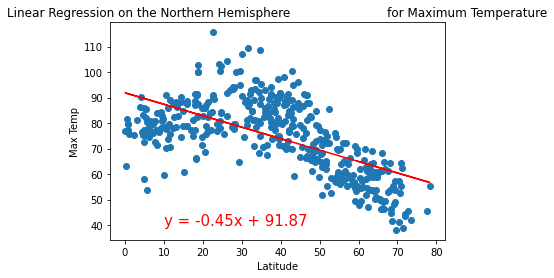

-0.6218331533901507


In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print (r_value)

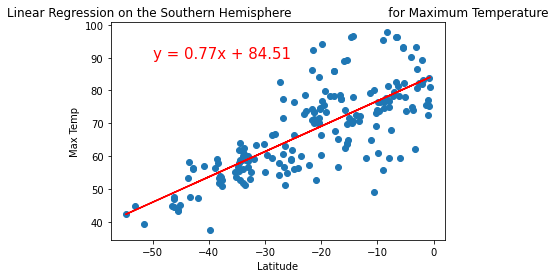

0.7579755117302824


In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print (r_value)

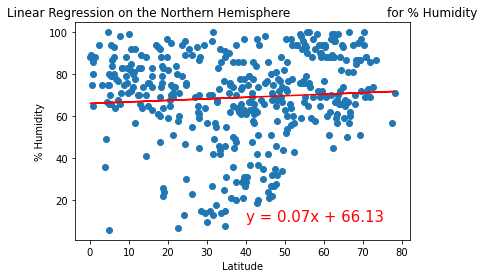

0.06731870976190968


In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print (r_value)

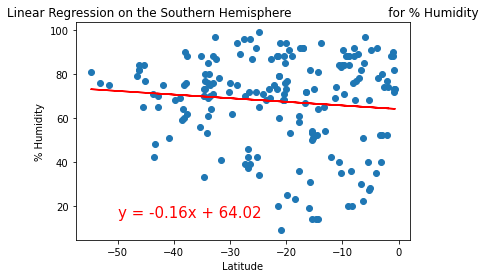

-0.1040901128344805


In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print (r_value)

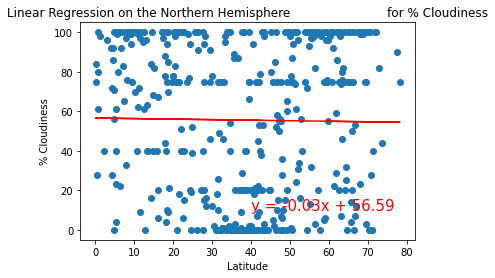

-0.013897970156341916


In [37]:
# Linear regression on the Northern Hemisphere: Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print (r_value)

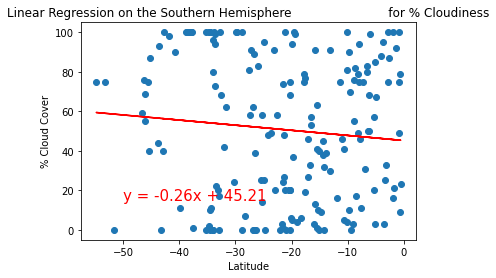

-0.09439742015609598


In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloud Cover',(-50,15))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print (r_value)

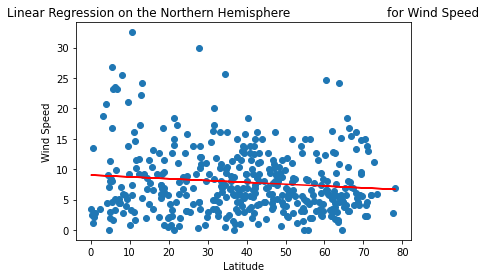

-0.11131626454199259


In [39]:
# Linear regression on the Northern Hemisphere Wind Speeds
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print (r_value)

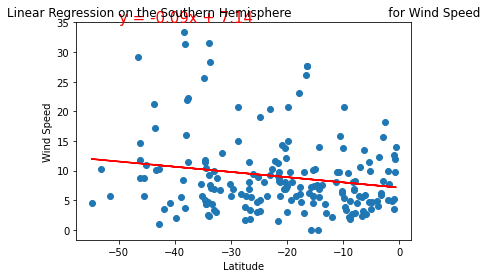

-0.17893381650430132


In [40]:
# Linear regression on the Southern Hemisphere Wind Speeds
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print (r_value)